In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from utils import clean_dataset
sns.set_context('notebook')

In [2]:
data = pd.read_csv('data/train.csv')
survived = data['Survived']
clean_dataset(data)
data['Survived'] = data['Survived'].map({0: 'No', 1: 'Yes'})
data['Pclass'] = data['Pclass'].map({1: 'Upper', 2: 'Middle', 3: 'Lower'})
data['Embarked'] = data['Embarked'].map({'C': 'Cherbourg', 'Q' : 'Queenstown', 'S' : 'Southampton'})
by_survive = data.groupby(['Survived'])
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,No,Lower,male,22.0,1,0,7.2500,Southampton
1,Yes,Upper,female,38.0,1,0,71.2833,Cherbourg
2,Yes,Lower,female,26.0,0,0,7.9250,Southampton
3,Yes,Upper,female,35.0,1,0,53.1000,Southampton
4,No,Lower,male,35.0,0,0,8.0500,Southampton


Number of survivors and deceased by Age

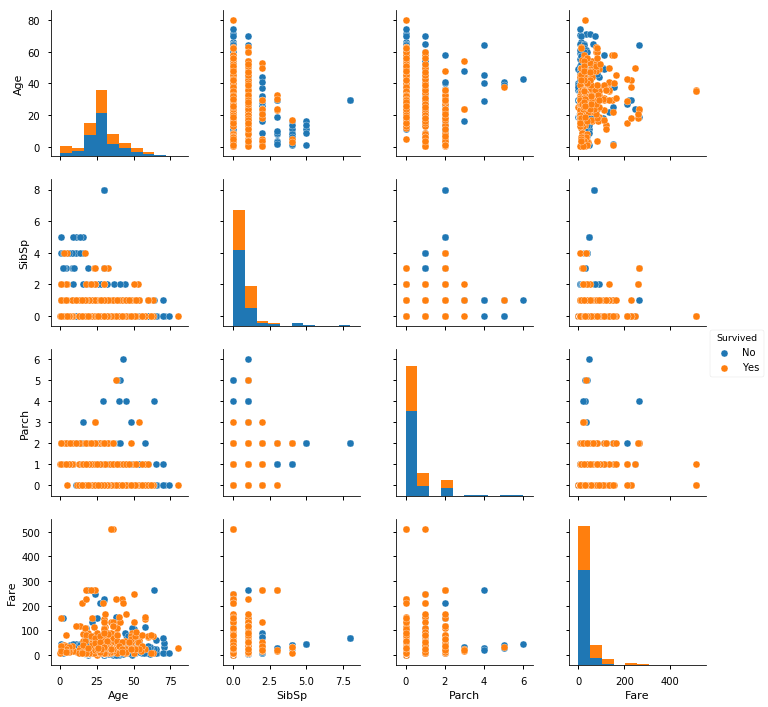

In [54]:
sns.pairplot(data, hue='Survived')
plt.show()

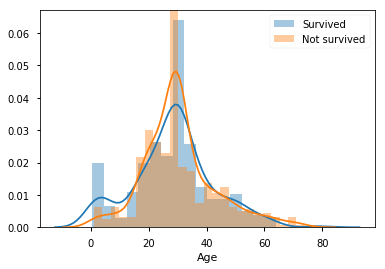

In [52]:
sns.distplot(data[survived==True]['Age'], label='Survived')
sns.distplot(data[survived==False]['Age'], label='Not survived')
plt.legend()
plt.show()

Number of survivors and deceased by Fare

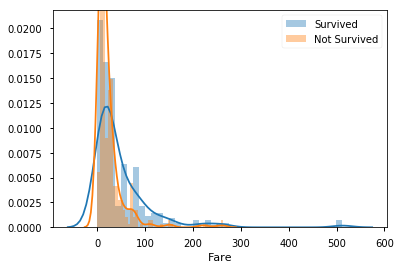

In [53]:
sns.distplot(data[survived==True]['Fare'], label='Survived')
sns.distplot(data[survived==False]['Fare'], label='Not Survived')
plt.legend(); plt.show()

In [5]:
def plot_by_survive(col):
    fig, axs = plt.subplots(ncols=2)
    d = pd.DataFrame(data[col].value_counts(normalize=True).mul(100).rename('%'))
    sns.barplot(data=d,x=d.index,y='%', ax=axs[0])
    sns.barplot(data=data.groupby([col])['Survived']
                .value_counts(normalize=True)
                .rename('%')
                .mul(100)
                .reset_index(), x='Survived', y='%', hue=col, ax=axs[1])
    return fig

Number of survivors and deceased by Sex

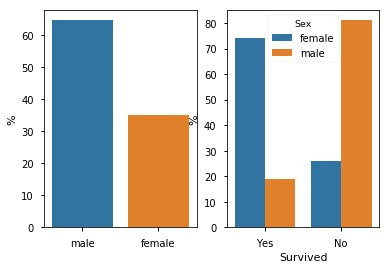

In [6]:
fig = plot_by_survive('Sex')
#d = data['Sex'].value_counts(normalize=True)
#d.index
plt.show()

Number of survivors and deceased by Pclass

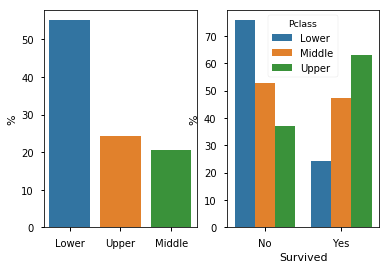

In [7]:
plot_by_survive('Pclass')
plt.show()

Number of survivors and deceased by SibSp

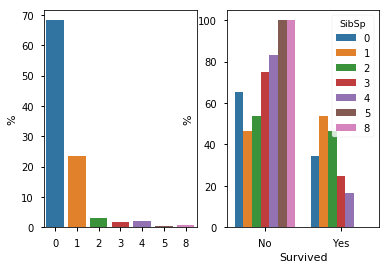

In [8]:
plot_by_survive('SibSp')
plt.show()

Number of survivors and deceased by Parch

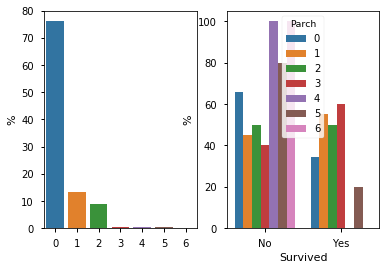

In [9]:
plot_by_survive('Parch')
plt.show()

Number of survivors and deceased by Embarked

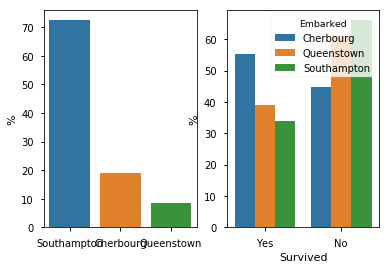

In [10]:
plot_by_survive('Embarked')
plt.show()

In [11]:
sns.pairplot(data=data, vars=('Sex', 'PClass'), hue='Survived')
plt.show()

TypeError: '<' not supported between instances of 'str' and 'float'

In [15]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer
from sklearn.manifold import TSNE

In [27]:
pclass_transf   = LabelBinarizer().fit(data['Pclass'])
sex_tranf       = LabelBinarizer().fit(data['Sex'])
sibsp_transf    = LabelBinarizer().fit(data['SibSp'])
parch_transf    = LabelBinarizer().fit(data['Parch'])
embarked_transf = LabelBinarizer().fit(data['Embarked'])

def get_feature_vectors(df):
    age_vec = np.array(df['Age']).reshape(-1, 1)
    fare_vec = np.array(df['Fare']).reshape(-1,1)
    pclass_vec = pclass_transf.transform(df['Pclass'])
    sex_vec = sex_tranf.transform(df['Sex'])
    sibsp_vec = sibsp_transf.transform(df['SibSp'])
    parch_vec = parch_transf.transform(df['Parch'])
    embarked_vec = embarked_transf.transform(df['Embarked'])
    
    data_values = np.concatenate((age_vec,
                                  fare_vec, 
                                  sex_vec,
                                  sibsp_vec,
                                  parch_vec,
                                  embarked_vec,
                                  pclass_vec),
                                 axis=1)
    return data_values

training_features = get_feature_vectors(data)

In [28]:
normalizer = StandardScaler()
training_features = normalizer.fit_transform(training_features)

In [34]:
transf = TSNE(n_components=2)

X_embedded = transf.fit_transform(training_features)

In [44]:
X_embedded_s = X_embedded[np.array(data['Survived'] == 'Yes')]
X_embedded_n = X_embedded[np.array(data['Survived'] == 'No')]

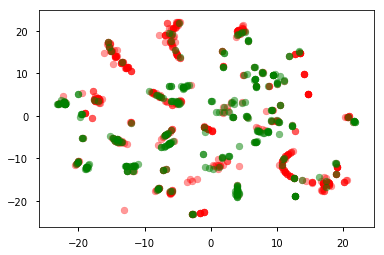

In [50]:
plt.scatter(X_embedded_n[...,0], X_embedded_n[...,1], color='r', alpha=0.4)
plt.scatter(X_embedded_s[...,0], X_embedded_s[...,1], color='g', alpha=0.5)
plt.show()

In [ ]:
plt.scatter(data[survived == 'Yes']['Fare'], X_embedded_n[...,1], color='r', alpha=0.4)
